# Introdução

Este notebook tem o objetivo de utilizar o conjunto de dados de consumo de veículos elétricos 
para realizar as etapas de pré-processamento de dados, divisão da base, treinamento de modelos
do tipo MLP, busca por otimização de hyperparâmetros e estrutura da rede neural e uma portabilidade
para execução da rede resultante em arquitetura esp32. 
Cada uma das atividades indicas é desenvolvida em um dos itens a seguir. Ressalta-se que não se 
buscou a excelência do resulto, mas a estruturação do código e a demonstração da possibilidade e
de como se alcançar o objetivo. 

O conjunto de dados não consta no repositório devido ao tamanho dos arquivos, mas pode ser obtido
em https://github.com/zhangsl2013/eVED . O dataset utilizado é uma exemplificação do trabalho a 
ser realizado no projeto DCAI, de modo que não se buscou trabalhar melhor os dados e nem efetivamente
encontrar a MLP ótima, uma vez que os dados serão diferentes.

O dataset eVED é uma extensão do dataset VED em https://github.com/gsoh/VED . Foram adicionados dados
acerca do trajeto dos veículos, mas os dados não foram adicionados a todas as entradas. Acabei por
dropar grande parte das colunas de extensão. O dataset VED tem duas planilhas auxiliares chamadas
VED_Static_Data_ICE&HEV.xlsx e VED_Static_Data_PHEV&EV.xlsx, as quais possuem dados acerca dos veículos
utilizados para coletar os dados do VED. As planilhas são relacionadas com o dataset principal pela 
coluna VehId.

Posso realizar um filtro por veículos puramente elétricos pegando todos os VehID no arquivo VED_Static_Data_PHEV&EV.xlsx
que são puramente elétricos. Depois, realizo um filtro pelo VehId no dataset principal.

# Concatenação dos Datasets

In [3]:
# O dataset eVED é disponibilizado fragmentado em diversos csvs. Para a sua utilização, é necessária a concatenação dos arquivos em um dataframe
# Aqui encontram-se as importações de bibliotecas necessárias para realizar a concatenação
import pandas as pd
import glob
import os

In [4]:
# Lista todos os arquivos csv contidos na pasta do dataset eved
filelist = glob.glob(os.path.join("./eVED/", '*.csv'))
dataframes = []

# Itera por todos os arquivos, lendo-os para memória e adicionando em uma lista de dataframes
for filename in sorted(filelist): 
    print (str(filename))
    dataframes.append(pd.read_csv(filename))

# Concatena todos os dataframes lidos
data = pd.concat(dataframes)
data.shape

./eVED/eVED_171101_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171108_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171115_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171122_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171129_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171206_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171213_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171220_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171227_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180103_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180110_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180117_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180124_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180131_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180207_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180214_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180221_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180228_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180307_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180314_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180321_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180328_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180404_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180411_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180418_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180425_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180502_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180509_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180516_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180523_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180530_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180606_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180613_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180620_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180627_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180704_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180711_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180718_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180725_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180801_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180808_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180815_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180822_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180829_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180905_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180912_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180919_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180926_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_181003_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_181010_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_181017_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_181024_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_181031_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_181107_week.csv


(22436808, 36)

In [6]:
# Escreve o dataset concatenado em um arquivo de saída
df.to_csv("./dataset.csv", index=False)

# Pre-processamento dos Dados

## Leitura da Base

In [1]:
# Para realizar o treinamento das redes neurais do tipo MLP, é necessário um pré-processamento mínimo,
# incluindo etapas como remoção de missing values e criação de dummies para colunas categóricas
# Importação da biblioteca necessária para o tratamento
import pandas as pd

In [2]:
# Leitura do dataset concatenado, caso não esteja em memória ainda
data = pd.read_csv("./dataset.csv")
data.head()

/tmp/ipykernel_70742/1115124880.py:2: DtypeWarning: Columns (31,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./dataset.csv")


,Unnamed: 0,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],...,Matchted Latitude[deg],Matched Longitude[deg],Match Type,Class of Speed Limit,Speed Limit[km/h],Speed Limit with Direction[km/h],Intersection,Bus Stops,Focus Points,Focus Points;
0,0,1.586651,8.0,706.0,0.0,42.277558,-83.69875,40.0,22.129999,2285.0,...,42.277558,-83.698767,0,0.0,56,56.0,NaN,NaN,NaN,NaN
1,1,1.586651,8.0,706.0,200.0,42.277558,-83.69875,40.0,22.129999,2285.0,...,42.277558,-83.698767,1,0.0,56,56.0,NaN,NaN,NaN,NaN
2,2,1.586651,8.0,706.0,1100.0,42.277558,-83.69875,45.0,22.129999,2285.0,...,42.277558,-83.698767,1,0.0,56,56.0,NaN,NaN,NaN,NaN
3,3,1.586651,8.0,706.0,2100.0,42.277558,-83.69875,47.0,6.150000,2744.0,...,42.277558,-83.698767,1,0.0,56,56.0,NaN,NaN,NaN,NaN
4,4,1.586651,8.0,706.0,4200.0,42.277558,-83.69875,48.0,21.440001,1982.0,...,42.277558,-83.698767,1,0.0,56,56.0,NaN,NaN,NaN,NaN


In [3]:
# Exploração das colunas disponíveis e seus tipos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22436808 entries, 0 to 22436807
Data columns (total 37 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   DayNum                            float64
 2   VehId                             float64
 3   Trip                              float64
 4   Timestamp(ms)                     float64
 5   Latitude[deg]                     float64
 6   Longitude[deg]                    float64
 7   Vehicle Speed[km/h]               float64
 8   MAF[g/sec]                        float64
 9   Engine RPM[RPM]                   float64
 10  Absolute Load[%]                  float64
 11  OAT[DegC]                         float64
 12  Fuel Rate[L/hr]                   float64
 13  Air Conditioning Power[kW]        float64
 14  Air Conditioning Power[Watts]     float64
 15  Heater Power[Watts]               float64
 16  HV Battery Current[A]             

## Filtrando Somente Veículos EV e Removendo Colunas Segundo Paulo Inmetro

In [4]:
# Veíuclos EV são os VehId 10, 455 e 541
data = data[data['VehId'].isin([10, 455, 541])]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476308 entries, 416 to 22414425
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        476308 non-null  int64  
 1   DayNum                            476308 non-null  float64
 2   VehId                             476308 non-null  float64
 3   Trip                              476308 non-null  float64
 4   Timestamp(ms)                     476308 non-null  float64
 5   Latitude[deg]                     476308 non-null  float64
 6   Longitude[deg]                    476308 non-null  float64
 7   Vehicle Speed[km/h]               476308 non-null  float64
 8   MAF[g/sec]                        0 non-null       float64
 9   Engine RPM[RPM]                   0 non-null       float64
 10  Absolute Load[%]                  0 non-null       float64
 11  OAT[DegC]                         476308 non-null  fl

In [6]:
data = data[['Latitude[deg]', 'Longitude[deg]', 'Vehicle Speed[km/h]', 'OAT[DegC]', 'Air Conditioning Power[Watts]', 'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]', 'HV Battery Voltage[V]', 'Energy_Consumption']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476308 entries, 416 to 22414425
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Latitude[deg]                  476308 non-null  float64
 1   Longitude[deg]                 476308 non-null  float64
 2   Vehicle Speed[km/h]            476308 non-null  float64
 3   OAT[DegC]                      476308 non-null  float64
 4   Air Conditioning Power[Watts]  476308 non-null  float64
 5   Heater Power[Watts]            476308 non-null  float64
 6   HV Battery Current[A]          476308 non-null  float64
 7   HV Battery SOC[%]              476308 non-null  float64
 8   HV Battery Voltage[V]          476308 non-null  float64
 9   Energy_Consumption             476308 non-null  float64
dtypes: float64(10)
memory usage: 40.0 MB


## Removendo Missing Values

Não há a missing values com o filtro por EV e as colunas indicadas

## Transformando Colunas Categóricas em Números

Não há a missing values com o filtro por EV e as colunas indicadas

## Removendo Linhas Duplicadas

In [8]:
data.shape

(476308, 10)

In [9]:
data.drop_duplicates().shape

(450234, 10)

In [10]:
data = data.drop_duplicates()
data.shape

(450234, 10)

## Removendo Outliers

Fiz pelo boxplot. Outra forma seria usar diretamente o DBSCAN. 
Posso fazer o outro modo posteriormente e verificar qual dos dois ficou melhor.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450234 entries, 416 to 22414425
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Latitude[deg]                  450234 non-null  float64
 1   Longitude[deg]                 450234 non-null  float64
 2   Vehicle Speed[km/h]            450234 non-null  float64
 3   OAT[DegC]                      450234 non-null  float64
 4   Air Conditioning Power[Watts]  450234 non-null  float64
 5   Heater Power[Watts]            450234 non-null  float64
 6   HV Battery Current[A]          450234 non-null  float64
 7   HV Battery SOC[%]              450234 non-null  float64
 8   HV Battery Voltage[V]          450234 non-null  float64
 9   Energy_Consumption             450234 non-null  float64
dtypes: float64(10)
memory usage: 37.8 MB


In [12]:
import matplotlib.pyplot as plt

### Latitude

In [13]:
# Analisando os dados dos gráficos e estatísticas abaixo, não há outliers nos dados de Latitude de Veículos.
# Compondo o quadrado min e max de Lat e Long, pode-se afirmar que todos os dados são oriundos de Michigan nos EUA.
data['Latitude[deg]'].describe()

count    450234.000000
mean         42.273936
std           0.019859
min          42.220368
25%          42.259720
50%          42.277338
75%          42.287412
max          42.324307
Name: Latitude[deg], dtype: float64

(array([ 10836.,  11368.,  50563.,  56121.,  56979.,  87564., 108490.,
         43817.,  17748.,   6748.]),
 array([42.22036778, 42.23076167, 42.24115556, 42.25154944, 42.26194333,
        42.27233722, 42.28273111, 42.293125  , 42.30351889, 42.31391278,
        42.32430667]),
 <BarContainer object of 10 artists>)

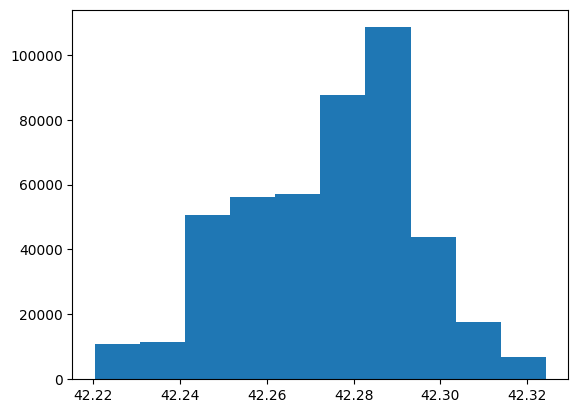

In [14]:
plt.hist(data['Latitude[deg]'])

{'whiskers': [<matplotlib.lines.Line2D at 0x71683719ff20>,
 'caps': [<matplotlib.lines.Line2D at 0x7168371d0500>,
 'boxes': [<matplotlib.lines.Line2D at 0x71683719fc80>],
 'medians': [<matplotlib.lines.Line2D at 0x7168371d0a70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7168371d0d10>],
 'means': []}

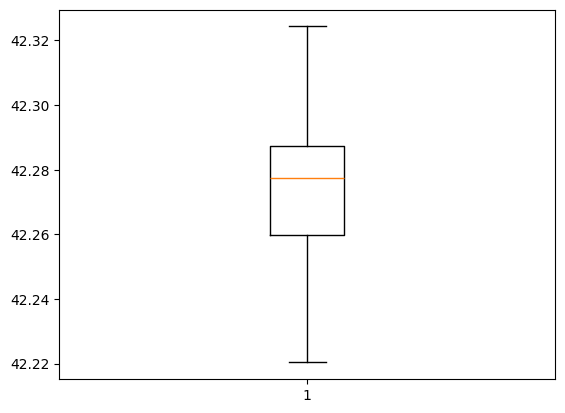

In [15]:
plt.boxplot(data['Latitude[deg]'])

### Longitude

In [16]:
data['Longitude[deg]'].describe()

count    450234.000000
mean        -83.732456
std           0.025079
min         -83.802211
25%         -83.745259
50%         -83.736049
75%         -83.717386
max         -83.674236
Name: Longitude[deg], dtype: float64

(array([ 11159.,  12956.,  14297.,  23133., 141765., 104585.,  42349.,
         43415.,  33570.,  23005.]),
 array([-83.80221111, -83.78941364, -83.77661617, -83.76381869,
        -83.75102122, -83.73822375, -83.72542628, -83.71262881,
        -83.69983133, -83.68703386, -83.67423639]),
 <BarContainer object of 10 artists>)

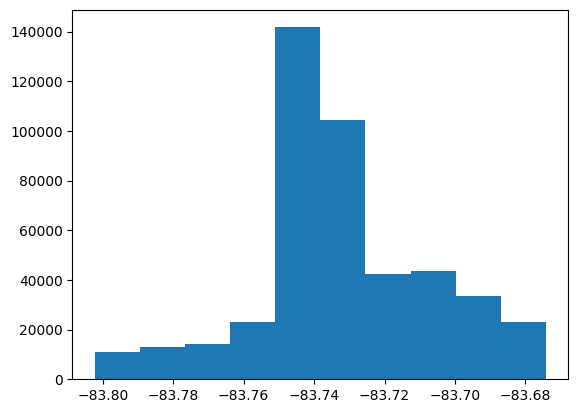

In [17]:
plt.hist(data['Longitude[deg]'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7168370ada60>,
 'caps': [<matplotlib.lines.Line2D at 0x7168370adf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7168370ad7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7168370ae540>],
 'fliers': [<matplotlib.lines.Line2D at 0x7168370ae720>],
 'means': []}

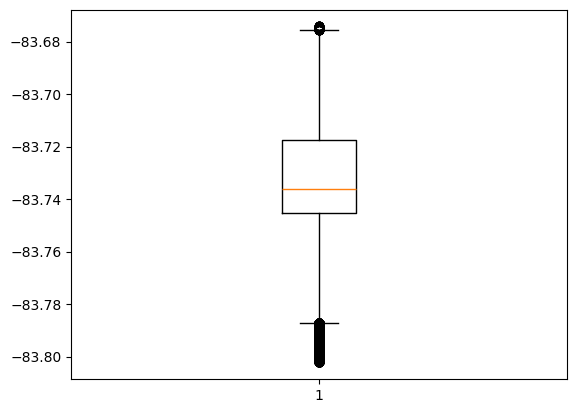

In [18]:
plt.boxplot(data['Longitude[deg]'])

### Vehicle Speed

In [19]:
data['Vehicle Speed[km/h]'].describe()

count    450234.000000
mean         40.654472
std          23.480590
min           0.000000
25%          23.400000
50%          42.009998
75%          57.840000
max         132.129990
Name: Vehicle Speed[km/h], dtype: float64

(array([69946., 58016., 80297., 93117., 93694., 41202.,  6242.,  2712.,
         4100.,   908.]),
 array([  0.        ,  13.21299896,  26.42599792,  39.63899689,
         52.85199585,  66.06499481,  79.27799377,  92.49099274,
        105.7039917 , 118.91699066, 132.12998962]),
 <BarContainer object of 10 artists>)

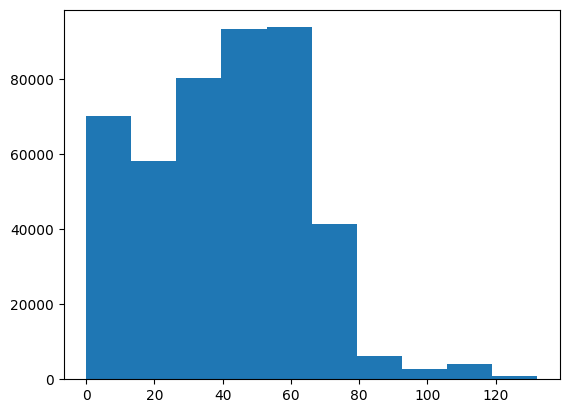

In [20]:
plt.hist(data['Vehicle Speed[km/h]'])

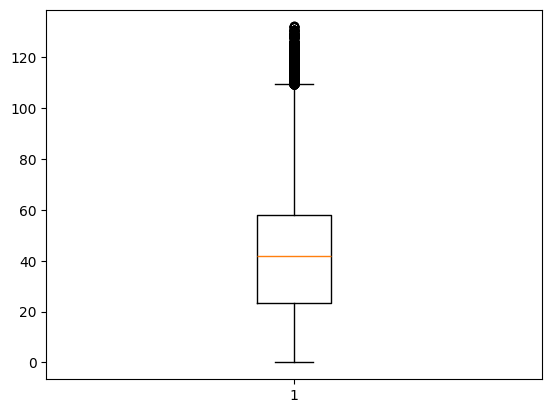

In [21]:
box = plt.boxplot(data['Vehicle Speed[km/h]'])

In [22]:
# O bigode superior está no 109,5
# Farei o corte no 110, perdendo 3533 registros
print(len(data[data['Vehicle Speed[km/h]'] > 100]))
print(len(data[data['Vehicle Speed[km/h]'] > 110]))
print(data.shape)
[i.get_ydata() for i in box['whiskers']]

6593
3533
(450234, 10)


[array([23.39999962,  0.        ]), array([ 57.84000015, 109.5       ])]

In [23]:
# Há uma pequena concentração de medidas com velocidades muito altas, chegando a 173 km/h
# É possível que veículos tenham atingido essa velocidade e esse seja um evento real. 
# No entanto, como temos poucas amostras desses veículos e isso poderá causar problemas como outliers,
# vamos removê-los do dataset e construir um modelo bom em previsões de velocidades urbanas.
data = data.drop(data[data['Vehicle Speed[km/h]'] > 110].index)

In [24]:
data.shape

(446701, 10)

### OAT

In [25]:
data['OAT[DegC]'].describe()

count    446701.000000
mean         11.958975
std          11.840029
min         -15.500000
25%           2.500000
50%          11.000000
75%          22.000000
max          36.000000
Name: OAT[DegC], dtype: float64

(array([ 4710., 27019., 37129., 92741., 54817., 46693., 50991., 63794.,
        49933., 18874.]),
 array([-15.5 , -10.35,  -5.2 ,  -0.05,   5.1 ,  10.25,  15.4 ,  20.55,
         25.7 ,  30.85,  36.  ]),
 <BarContainer object of 10 artists>)

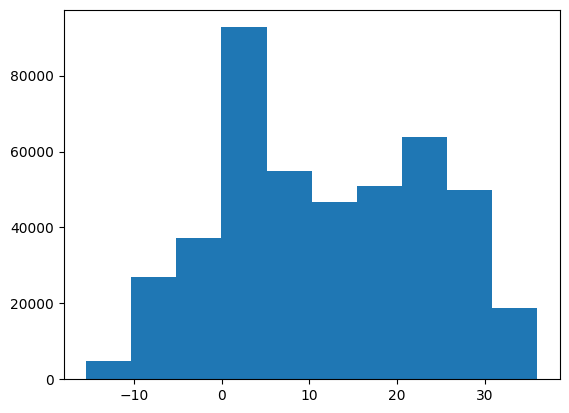

In [26]:
plt.hist(data['OAT[DegC]'])

{'whiskers': [<matplotlib.lines.Line2D at 0x716836e48ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x716836e49040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7168840754c0>],
 'medians': [<matplotlib.lines.Line2D at 0x716836e49580>],
 'fliers': [<matplotlib.lines.Line2D at 0x716836e49850>],
 'means': []}

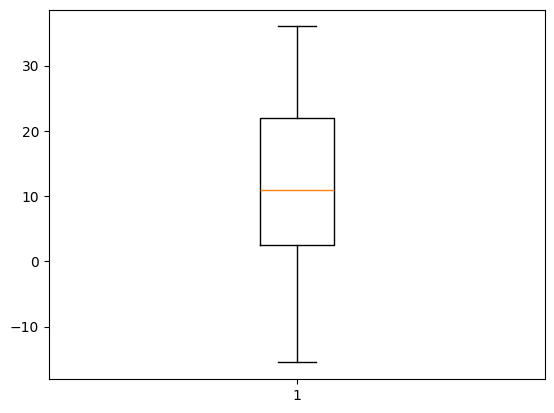

In [27]:
plt.boxplot(data['OAT[DegC]'])

### Air Conditioning Power[Watts]

In [28]:
data['Air Conditioning Power[Watts]'].describe()

count    446701.000000
mean        363.107425
std         368.146316
min           0.000000
25%           0.000000
50%         300.000000
75%         550.000000
max        3100.000000
Name: Air Conditioning Power[Watts], dtype: float64

(array([2.32134e+05, 1.11405e+05, 5.65330e+04, 4.23630e+04, 2.34200e+03,
        1.20300e+03, 1.46000e+02, 3.07000e+02, 1.34000e+02, 1.34000e+02]),
 array([   0.,  310.,  620.,  930., 1240., 1550., 1860., 2170., 2480.,
        2790., 3100.]),
 <BarContainer object of 10 artists>)

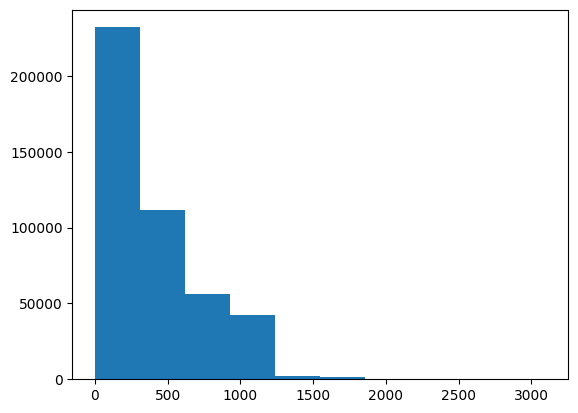

In [29]:
plt.hist(data['Air Conditioning Power[Watts]'])

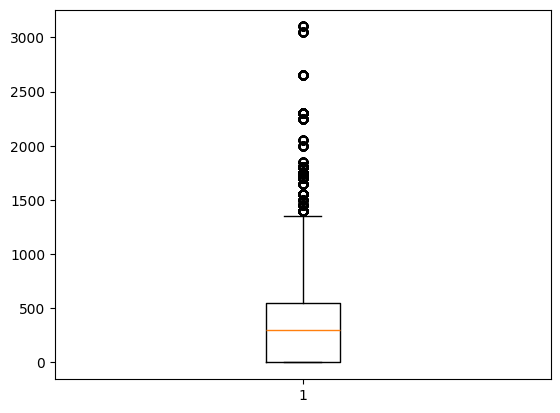

In [30]:
box = plt.boxplot(data['Air Conditioning Power[Watts]'])

In [31]:
# O bigode superior está no 1350
# Farei o corte no 1350, perdendo 2333 registros
print(len(data[data['Air Conditioning Power[Watts]'] > 1350]))
print(data.shape)
[i.get_ydata() for i in box['whiskers']]

2333
(446701, 10)


[array([0., 0.]), array([ 550., 1350.])]

In [32]:
data = data.drop(data[data['Air Conditioning Power[Watts]'] > 1350].index)
data.shape

(444368, 10)

### Heater Power

In [33]:
data['Heater Power[Watts]'].describe()

count    444368.000000
mean        353.259011
std         800.218617
min           0.000000
25%           0.000000
50%           0.000000
75%         250.000000
max        4250.000000
Name: Heater Power[Watts], dtype: float64

(array([3.15506e+05, 0.00000e+00, 2.75520e+04, 0.00000e+00, 0.00000e+00,
        2.63220e+04, 0.00000e+00, 0.00000e+00, 1.79120e+04, 0.00000e+00,
        0.00000e+00, 1.10620e+04, 0.00000e+00, 0.00000e+00, 5.94400e+03,
        0.00000e+00, 0.00000e+00, 6.31700e+03, 0.00000e+00, 0.00000e+00,
        4.45500e+03, 0.00000e+00, 0.00000e+00, 3.11300e+03, 0.00000e+00,
        0.00000e+00, 3.08800e+03, 0.00000e+00, 0.00000e+00, 2.87200e+03,
        0.00000e+00, 0.00000e+00, 2.92700e+03, 0.00000e+00, 0.00000e+00,
        4.23500e+03, 0.00000e+00, 0.00000e+00, 3.27900e+03, 0.00000e+00,
        0.00000e+00, 4.21700e+03, 0.00000e+00, 0.00000e+00, 4.26500e+03,
        0.00000e+00, 0.00000e+00, 1.28600e+03, 0.00000e+00, 1.60000e+01]),
 array([   0.,   85.,  170.,  255.,  340.,  425.,  510.,  595.,  680.,
         765.,  850.,  935., 1020., 1105., 1190., 1275., 1360., 1445.,
        1530., 1615., 1700., 1785., 1870., 1955., 2040., 2125., 2210.,
        2295., 2380., 2465., 2550., 2635., 2720., 2805.

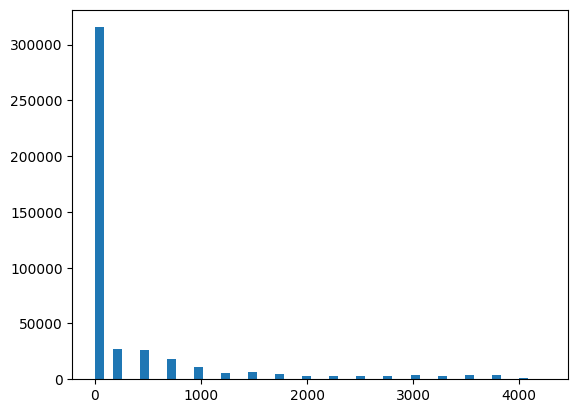

In [34]:
plt.hist(data['Heater Power[Watts]'], bins=50)

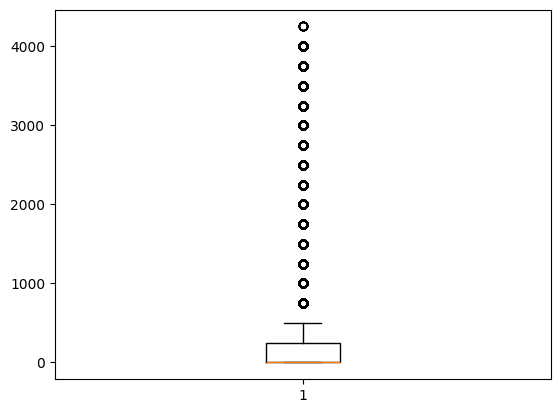

In [35]:
box = plt.boxplot(data['Heater Power[Watts]'])

In [36]:
# Os cortes dos outliers perdem quase 1/4 da base.
# Estatisticamente a presença de muitos zeros traz as métricas para baixo gerando muitos outliers altos.
# Não eliminarei os outliers dessa coluna
print(len(data[data['Heater Power[Watts]'] > 500]))
print(data.shape)
[i.get_ydata() for i in box['whiskers']]

74988
(444368, 10)


[array([0., 0.]), array([250., 500.])]

In [37]:
import numpy as np
upper_quartile = np.percentile(data['Heater Power[Watts]'], 75)
lower_quartile = np.percentile(data['Heater Power[Watts]'], 25)

iqr = upper_quartile - lower_quartile
data[data['Heater Power[Watts]'] <= upper_quartile+1.5*iqr]['Heater Power[Watts]'].max()

500.0

### HV Battery Current

In [38]:
data['HV Battery Current[A]'].describe()

count    444368.000000
mean        -15.640822
std          30.359400
min        -290.500000
25%         -35.000000
50%         -13.500000
75%           3.000000
max         118.500000
Name: HV Battery Current[A], dtype: float64

(array([1.2000e+01, 0.0000e+00, 3.0000e+00, 2.0000e+01, 2.0000e+01,
        2.7000e+01, 1.7000e+01, 1.4000e+01, 2.3000e+01, 1.3000e+01,
        0.0000e+00, 2.2000e+01, 1.0000e+01, 2.7000e+01, 2.4000e+01,
        4.7000e+01, 5.7000e+01, 1.1200e+02, 1.3400e+02, 2.0300e+02,
        3.9200e+02, 5.1700e+02, 8.4000e+02, 1.5100e+03, 2.4230e+03,
        4.7020e+03, 7.1770e+03, 1.1353e+04, 1.5901e+04, 2.2940e+04,
        3.3014e+04, 4.1400e+04, 4.2452e+04, 4.3176e+04, 4.5736e+04,
        6.2152e+04, 3.1159e+04, 2.8412e+04, 2.3624e+04, 1.2594e+04,
        5.0760e+03, 2.9160e+03, 1.7990e+03, 7.7900e+02, 5.3300e+02,
        4.4500e+02, 2.4000e+02, 1.6700e+02, 1.1300e+02, 4.1000e+01]),
 array([-290.5 , -282.32, -274.14, -265.96, -257.78, -249.6 , -241.42,
        -233.24, -225.06, -216.88, -208.7 , -200.52, -192.34, -184.16,
        -175.98, -167.8 , -159.62, -151.44, -143.26, -135.08, -126.9 ,
        -118.72, -110.54, -102.36,  -94.18,  -86.  ,  -77.82,  -69.64,
         -61.46,  -53.28,  -45.1 ,

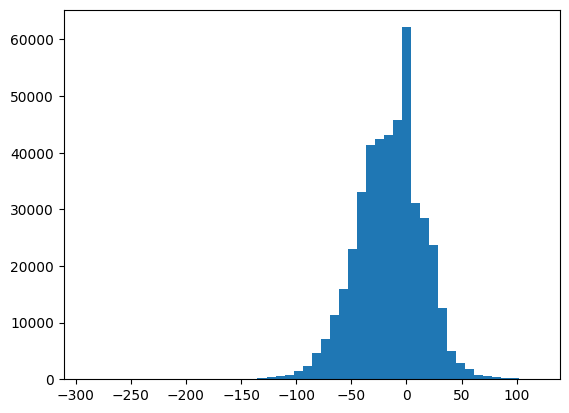

In [39]:
plt.hist(data['HV Battery Current[A]'], bins=50)

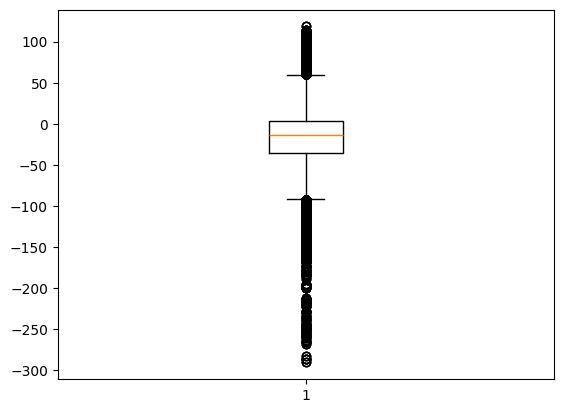

In [40]:
box = plt.boxplot(data['HV Battery Current[A]'])

In [41]:
print(len(data[data['HV Battery Current[A]'] > 60]))
print(len(data[data['HV Battery Current[A]'] < -92]))
print(data.shape)
[i.get_ydata() for i in box['whiskers']]

2440
4520
(444368, 10)


[array([-35., -92.]), array([ 3., 60.])]

In [42]:
data = data.drop(data[data['HV Battery Current[A]'] > 60].index)
data = data.drop(data[data['HV Battery Current[A]'] < -92].index)
data.shape

(437408, 10)

### HV Battery SOC

In [43]:
data['HV Battery SOC[%]'].describe()

count    437408.000000
mean         75.349120
std          19.875927
min           9.634146
25%          61.097565
50%          77.439026
75%          94.024391
max         100.000000
Name: HV Battery SOC[%], dtype: float64

(array([  491.,   186.,   196.,     0.,   244.,   513.,   860.,   615.,
          454.,  1053.,  1445.,  1243.,  2489.,  4043.,  3662.,  2862.,
         3528.,  3807.,  3643.,  6750.,  5727.,  8058.,  6921.,  8686.,
         9266.,  7577., 10098.,  9608., 11468., 12075., 10902., 14124.,
        14451.,  9424., 10530., 13285., 12288., 13349., 10869., 12841.,
        11847., 11572., 11950., 10424.,  8606., 14014., 15099., 17686.,
        18240., 68339.]),
 array([  9.63414574,  11.44146282,  13.24877991,  15.05609699,
         16.86341408,  18.67073116,  20.47804825,  22.28536533,
         24.09268242,  25.8999995 ,  27.70731659,  29.51463367,
         31.32195076,  33.12926785,  34.93658493,  36.74390202,
         38.5512191 ,  40.35853619,  42.16585327,  43.97317036,
         45.78048744,  47.58780453,  49.39512161,  51.2024387 ,
         53.00975578,  54.81707287,  56.62438995,  58.43170704,
         60.23902412,  62.04634121,  63.85365829,  65.66097538,
         67.46829247,  69.2756

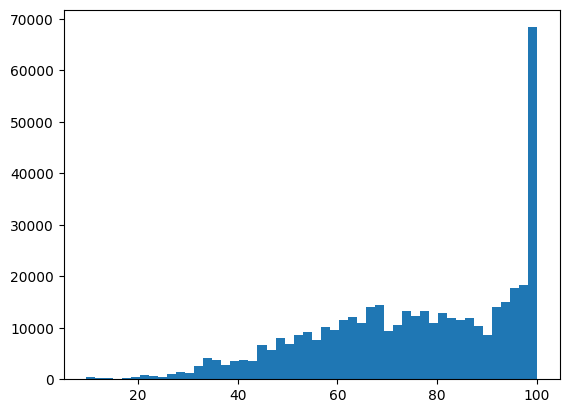

In [44]:
plt.hist(data['HV Battery SOC[%]'], bins=50)

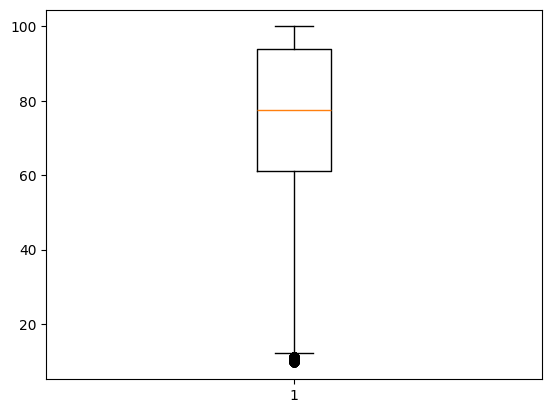

In [45]:
box = plt.boxplot(data['HV Battery SOC[%]'])

In [46]:
print(len(data[data['HV Battery SOC[%]'] < 12.07317066]))
print(data.shape)
[i.get_ydata() for i in box['whiskers']]

491
(437408, 10)


[array([61.0975647 , 12.07317066]), array([ 94.02439117, 100.        ])]

In [47]:
data = data.drop(data[data['HV Battery SOC[%]'] < 12.07317066].index)
data.shape

(436917, 10)

### HV Battery Voltage

In [48]:
data['HV Battery Voltage[V]'].describe()

count    436917.000000
mean        379.678787
std           7.991657
min         322.000000
25%         375.000000
50%         380.500000
75%         385.000000
max         395.500000
Name: HV Battery Voltage[V], dtype: float64

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        8.0000e+00, 2.0000e+01, 9.1000e+01, 1.1600e+02, 2.0300e+02,
        3.6400e+02, 4.4300e+02, 7.6000e+02, 1.2580e+03, 2.0870e+03,
        2.6780e+03, 3.3690e+03, 3.7880e+03, 5.0810e+03, 6.4640e+03,
        8.4650e+03, 1.0630e+04, 1.2943e+04, 1.0857e+04, 1.7846e+04,
        2.1047e+04, 2.4621e+04, 2.6918e+04, 3.0182e+04, 3.4397e+04,
        3.8585e+04, 3.3632e+04, 3.3215e+04, 2.3843e+04, 2.1408e+04,
        1.7729e+04, 1.5414e+04, 1.3792e+04, 9.6430e+03, 5.0180e+03]),
 array([322.  , 323.47, 324.94, 326.41, 327.88, 329.35, 330.82, 332.29,
        333.76, 335.23, 336.7 , 338.17, 339.64, 341.11, 342.58, 344.05,
        345.52, 346.99, 348.46, 349.93, 351.4 , 352.87, 354.34, 355.81,
        357.28, 358.75, 360.22, 361.69, 363.16, 364.63, 366.1 , 367.57,
        369.04, 370.51, 371.98

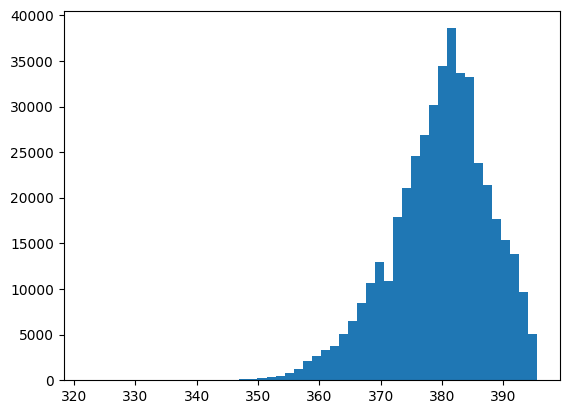

In [49]:
plt.hist(data['HV Battery Voltage[V]'], bins=50)

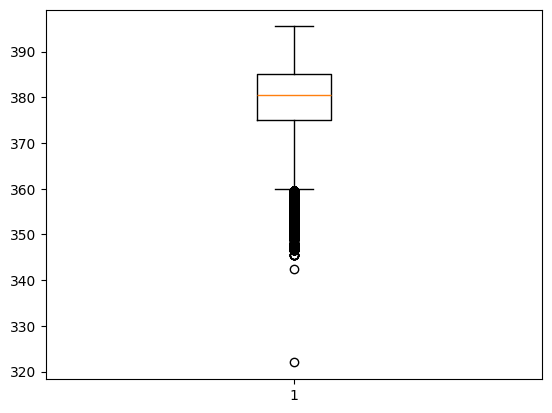

In [50]:
box = plt.boxplot(data['HV Battery Voltage[V]'])

In [51]:
print(len(data[data['HV Battery Voltage[V]'] < 360]))
print(data.shape)
[i.get_ydata() for i in box['whiskers']]

7083
(436917, 10)


[array([375., 360.]), array([385. , 395.5])]

In [52]:
data = data.drop(data[data['HV Battery Voltage[V]'] < 360].index)
data.shape

(429834, 10)

### Energy Consumption

In [56]:
data['Energy_Consumption'].describe()

count    429834.000000
mean          0.001543
std           0.002912
min          -0.006542
25%          -0.000320
50%           0.001356
75%           0.003551
max           0.009992
Name: Energy_Consumption, dtype: float64

(array([  297.,   745.,   900.,  1048.,  1061.,  1407.,  1752.,  2420.,
         3655.,  5159.,  6954.,  8097.,  9220., 10496., 10976., 11230.,
        11178., 11020., 12779., 19319., 32054., 22444., 16920., 15708.,
        15378., 15943., 16694., 16689., 16103., 15958., 16527., 13932.,
        12432., 11032.,  9820.,  8778.,  7349.,  6184.,  5655.,  4622.,
         4009.,  3561.,  2926.,  2492.,  1909.,  1780.,  1383.,  1100.,
          592.,   147.]),
 array([-6.54166667e-03, -6.21098889e-03, -5.88031111e-03, -5.54963333e-03,
        -5.21895556e-03, -4.88827778e-03, -4.55760000e-03, -4.22692222e-03,
        -3.89624444e-03, -3.56556667e-03, -3.23488889e-03, -2.90421111e-03,
        -2.57353333e-03, -2.24285556e-03, -1.91217778e-03, -1.58150000e-03,
        -1.25082222e-03, -9.20144444e-04, -5.89466667e-04, -2.58788889e-04,
         7.18888889e-05,  4.02566667e-04,  7.33244444e-04,  1.06392222e-03,
         1.39460000e-03,  1.72527778e-03,  2.05595556e-03,  2.38663333e-03,
         2

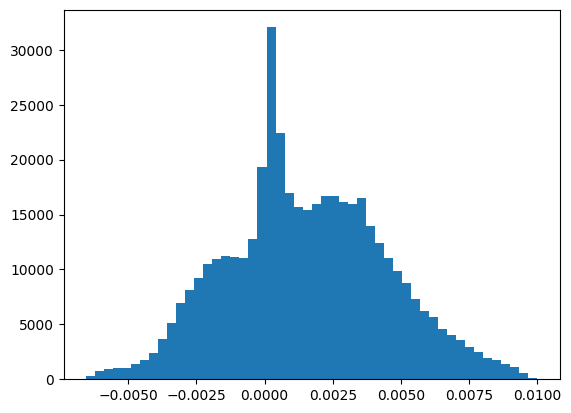

In [57]:
plt.hist(data['Energy_Consumption'], bins=50)

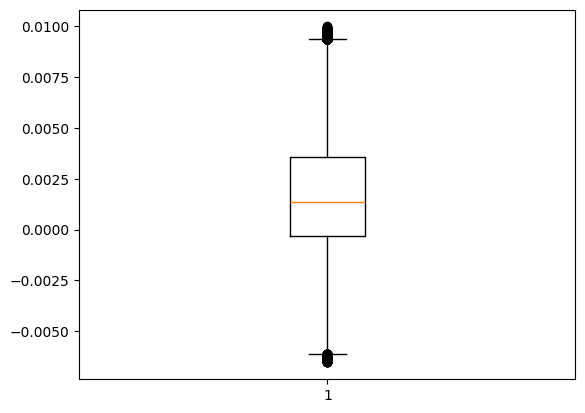

In [58]:
box = plt.boxplot(data['Energy_Consumption'])

In [60]:
print(len(data[data['Energy_Consumption'] > 0.0093525]))
print(len(data[data['Energy_Consumption'] < -0.00612535]))
print(data.shape)
[i.get_ydata() for i in box['whiskers']]

690
459
(429834, 10)


[array([-0.00031958, -0.00612535]), array([0.00355111, 0.0093525 ])]

In [61]:
data = data.drop(data[data['Energy_Consumption'] > 0.0093525].index)
data = data.drop(data[data['Energy_Consumption'] < -0.00612535].index)
data.shape

(428685, 10)

## Salvando o Dataset Final

In [62]:
# Salvando o dataset filtrado final em um arquivo.
# Este arquivo ficou com 39.8MB, muito menor que o dataset original
data.to_csv("./dataset_preprocessed.csv", index=False)

In [100]:
data.shape

(429834, 9)

# Treinamento do Modelo

## Leitura e Divisão

In [8]:
# Antes do treinamento do modelo, é necessário carregar a base em memória, caso ainda não tenha sido feito.
# Após isto, precisa-se dividir a base em treino e teste. Aqui está sendo disponibilizado um conjunto de 
# normalizadores dos valores para o teste da performance ao final. 
# Caso seja do desejo, escolher o melhor normalizador dos dados e utilizar, verificando a performance no final
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

In [9]:
# Leitura do dataset final para memória, caso ainda não tenha sido feito
data = pd.read_csv("./dataset_preprocessed.csv")
data.head()

,Latitude[deg],Longitude[deg],Vehicle Speed[km/h],OAT[DegC],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],HV Battery Voltage[V],Energy_Consumption
0,42.277066,-83.763404,53.590000,5.0,0.0,2250.0,-21.5,96.341469,386.0,0.002305
1,42.277066,-83.763404,51.980000,5.0,0.0,2250.0,-21.5,96.341469,386.0,0.002305
2,42.277066,-83.763404,50.369999,5.0,0.0,2250.0,-21.5,96.341469,386.0,0.002305
3,42.277066,-83.763404,50.369999,5.0,0.0,2250.0,23.5,96.341469,390.5,-0.002549
4,42.277066,-83.763404,49.799999,5.0,0.0,2250.0,23.5,96.341469,390.5,-0.002549


In [10]:
# Exibição das colunas e dos tipos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428685 entries, 0 to 428684
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Latitude[deg]                  428685 non-null  float64
 1   Longitude[deg]                 428685 non-null  float64
 2   Vehicle Speed[km/h]            428685 non-null  float64
 3   OAT[DegC]                      428685 non-null  float64
 4   Air Conditioning Power[Watts]  428685 non-null  float64
 5   Heater Power[Watts]            428685 non-null  float64
 6   HV Battery Current[A]          428685 non-null  float64
 7   HV Battery SOC[%]              428685 non-null  float64
 8   HV Battery Voltage[V]          428685 non-null  float64
 9   Energy_Consumption             428685 non-null  float64
dtypes: float64(10)
memory usage: 32.7 MB


In [11]:
# Divisão da base em colunas de entrada e coluna de rótulo
x = data.drop(columns=["Energy_Consumption"])
y = data["Energy_Consumption"]

# Definição de um SEED para reprodutibilidade das partes aleatórias
SEED = 12345

# Divisão da base em trein e teste
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.3, random_state=SEED)

In [13]:
print(x.iloc[0])
print()
print(y.iloc[0])
print()
print(data.iloc[0])

Latitude[deg]                      42.277066
Longitude[deg]                    -83.763404
Vehicle Speed[km/h]                53.590000
OAT[DegC]                           5.000000
Air Conditioning Power[Watts]       0.000000
Heater Power[Watts]              2250.000000
HV Battery Current[A]             -21.500000
HV Battery SOC[%]                  96.341469
HV Battery Voltage[V]             386.000000
Name: 0, dtype: float64

0.0023052777777777

Latitude[deg]                      42.277066
Longitude[deg]                    -83.763404
Vehicle Speed[km/h]                53.590000
OAT[DegC]                           5.000000
Air Conditioning Power[Watts]       0.000000
Heater Power[Watts]              2250.000000
HV Battery Current[A]             -21.500000
HV Battery SOC[%]                  96.341469
HV Battery Voltage[V]             386.000000
Energy_Consumption                  0.002305
Name: 0, dtype: float64


## Normalização

In [12]:
# Sem normalização
# https://medium.com/@otvioafpedro/entendendo-os-scalers-do-sklearn-preprocessing-ajustando-dados-para-an%C3%A1lise-de-mercado-600dc7ad65be
trainX_without_scale = trainX.to_numpy()
testX_without_scale = testX.to_numpy()

In [13]:
# Normalização Padrão (Z-Score)
standard_scaler = StandardScaler()

scaler = standard_scaler.fit(trainX)
trainX_standard_scaled = scaler.transform(trainX)
testX_standard_scaled = scaler.transform(testX)

In [14]:
# Normalização pelo MinMax
min_max_scaler = MinMaxScaler()

scaler = min_max_scaler.fit(trainX)
trainX_minmax_scaled = scaler.transform(trainX)
textX_minmax_scaled = scaler.transform(testX)

In [15]:
# Normalização pelo RobustScaler melhor para os outliers que eu deixei
robust_scaler = RobustScaler()

scaler = robust_scaler.fit(trainX)
trainX_robust_scaled = scaler.transform(trainX)
testX_robust_scaled = scaler.transform(testX)

In [16]:
# Normalização pelo MaxAbsScaler
max_abs_scaler = MaxAbsScaler()

scaler = max_abs_scaler.fit(trainX)
trainX_maxabs_scaled = scaler.transform(trainX)
testX_maxabs_scaled = scaler.transform(testX)

## Usando Sklearn MLPRegressor com GridSearchCV

In [29]:
# https://michael-fuchs-python.netlify.app/2021/02/10/nn-multi-layer-perceptron-regressor-mlpregressor/
# A primeira tentativa de se obter uma rede neural do tipo MLP otimizada foi utilizando o MLPRegressor da
# biblioteca SKLearn com o GridSearch CV. No entanto, ao final deste notebook, é necessária a portabilidade
# do modelo obtido para a arquitetura esp32. Esta portabilidade é realizada utilizando a biblioteca TensorFlow Lite.

# Observe que nada impede a busca do melhor modelo com o MLPRegressor com GridSearchCV que é efetivamente mais
# simples e performático e, posteriormente, utilizar o resultado para construir uma rede única com o TF e Keras, 
# portando para o esp32 em seguida. Em virtude desta observação, este trecho de códigog se manteve aqui no 
# notebook.
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [24]:
# Criando uma rede neural MLP com o sklearn para exemplo
mlp = MLPRegressor(
    hidden_layer_sizes=(32, 16, 8),
    max_iter=50,
    activation='relu',
    solver='adam',
    alpha=0.05,
    learning_rate='constant'
)

# Treinamento da rede com a base de treino
mlp.fit(trainX_scaled, trainY)

/home/andre/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(alpha=0.05, hidden_layer_sizes=(32, 16, 8), max_iter=50)

In [16]:
# Realizando predições com a base de testes
y_pred = mlp.predict(testX_scaled)

In [22]:
# Criando um grid de parâmetros possíveis para realizar a busca do tuning
param_grid = {
    'hidden_layer_sizes': [(32, 16, 8)],
    'max_iter': [50],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptative']
}

# Construindo o grid e fazendo os diversos treinamentos para achar o melhor.
# Aqui está sendo utilizando um cross validation com 5 folds e indicando à biblioteca
# que utilize quantas threads forem os núcleos do equipamento
grid = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5)
grid.fit(trainX_scaled, trainY)

# Imprimindo o melhor conjuntos de parâmetros, os quais podem ser utilizados diretamente no TFLite para a portabilidade para esp32
grid.best_params_

InvalidParameterError: The 'cv' parameter of GridSearchCV must be an int in the range [2, inf), an object implementing 'split' and 'get_n_splits', an iterable or None. Got 1 instead.

In [ ]:
# Realização de predições com o melhor modelo obtido no gridsearch
grid_predictions = grid.predict(testX_scaled)

## Usando TensorFlow

In [75]:
# https://www.tensorflow.org/tutorials/keras/regression?hl=pt-br
# A partir deste ponto, será realizado exatamente o mesmo procedimento do item anterior, no entanto
# realizado com o TensorFlow e o Keras
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers, regularizers

tf.__version__

2024-11-22 15:40:37.228628: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-22 15:40:37.659582: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-22 15:40:38.510243: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.16.1'

In [78]:
# Função para construir um modelo de rede neural MLP com o tensor flow
# Esta função recebe como parâmetro o model_type. O valor thomas indica para
# montar uma rede semelhante àquela produzida no tutorial do autor Thomas.
# O valor tensor, indica para criar uma rede semelhante a do tutorial do 
# próprio tensorflow.
def build_model(model_type, train_X):
    if model_type == 'thomas':
        # Criando uma rede semelhante a do tutorial do thomas
        # Uma camada de entrada, 3 camadas escondidas (32, 16 e 8), uma camada de saída para indicar o valor do consumo
        # Utiliza como função de ativação a relu nas camadas escondidas com regularizadores L2.
        # Para a camada de saída é utilizada uma função linear. O otimizador é o adam.
        model = keras.Sequential(
            [
                layers.Dense(
                    32, 
                    activation='relu', 
                    kernel_regularizer=regularizers.l2(0.0001),
                    input_shape=[len(train_X[0])]
                ),
                layers.Dense(
                    16, 
                    activation='relu', 
                    kernel_regularizer=regularizers.l2(0.0001),
                ),
                layers.Dense(
                    8, 
                    activation='relu', 
                    kernel_regularizer=regularizers.l2(0.0001),
                ),
                layers.Dense(
                    1, 
                    activation='linear'
                ),
            ]
        )
        optimizer = 'adam'
    elif model_type == 'tensor':
        # Rede exemplo do tutorial do tensorflow.
        # Possui uma camada de entrada, duas camadas escondidas de 64 neurônios cada uma, com função de ativação relu.
        # O otimizador é o RMSprop
        model = keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=[len(train_X[0])]),
            layers.Dense(64, activation='relu'),
            layers.Dense(1)
        ])

        optimizer = tf.keras.optimizers.RMSprop(0.001)

    # Como função de perda foi escolhida a mse e para métricas a própria mse e a mae
    model.compile(
        loss='mse',
        optimizer=optimizer,
        metrics=['mae', 'mse']
    )

    return model

In [80]:
# Criando um modelo do tipo exibido no tutorial do tensorflow e exibindo o resumo da rede
model = build_model(model_type='tensor', train_X=trainX_standard_scaled)
model.summary()

/home/andre/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-22 15:42:54.714192: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-22 15:42:54.827427: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# Criando uma callback para early stopping no treinamento da rede neural
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Treinando um exemplo de modelo de rede neural MLP
history = model.fit(
    trainX_standard_scaled,
    trainY,
    batch_size=128,
    epochs=50,
    validation_split=0.2,
    verbose=1,
    # callbacks=[early_stop]
)

Epoch 1/50
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - loss: 7.7258e-07 - mae: 7.5642e-04 - mse: 7.7258e-07 - val_loss: 1.2708e-06 - val_mae: 0.0010 - val_mse: 1.2708e-06
Epoch 2/50
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - loss: 7.7076e-07 - mae: 7.5870e-04 - mse: 7.7076e-07 - val_loss: 8.1976e-07 - val_mae: 8.0232e-04 - val_mse: 8.1976e-07
Epoch 3/50
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - loss: 7.5947e-07 - mae: 7.5295e-04 - mse: 7.5947e-07 - val_loss: 3.5335e-07 - val_mae: 4.8560e-04 - val_mse: 3.5335e-07
Epoch 4/50
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - loss: 7.4411e-07 - mae: 7.4903e-04 - mse: 7.4411e-07 - val_loss: 6.0635e-07 - val_mae: 6.7772e-04 - val_mse: 6.0635e-07
Epoch 5/50
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - loss: 7.3903e-07 - mae: 7.4434e-04 - mse: 7.3903e-07 - val_loss: 7.0391e-07 - val_mae: 7.3942e-04 - val_mse: 7.0391e-07
Epoch 6/50
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - loss: 7.2511e-07 - mae: 7.3418e-04 - mse: 7.2511e-07 - v

In [88]:
# Função para plotar dois gráficos (mae e mse) das métricas de treinamento
# O primeiro gráfico é da mae e o segundo da mse, neles são exibidas duas linhas, sendo uma de validação e a outra do treinamento
def plot_history(history):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.plot(df_hist['epoch'], df_hist['mae'], label='Train Error')
    plt.plot(df_hist['epoch'], df_hist['val_mae'], label='Val Error')
    # plt.ylim([0, 5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(df_hist['epoch'], df_hist['mse'], label='Train Error')
    plt.plot(df_hist['epoch'], df_hist['val_mse'], label='Val Error')
    # plt.ylim([0, 20])
    plt.legend()
    plt.show()

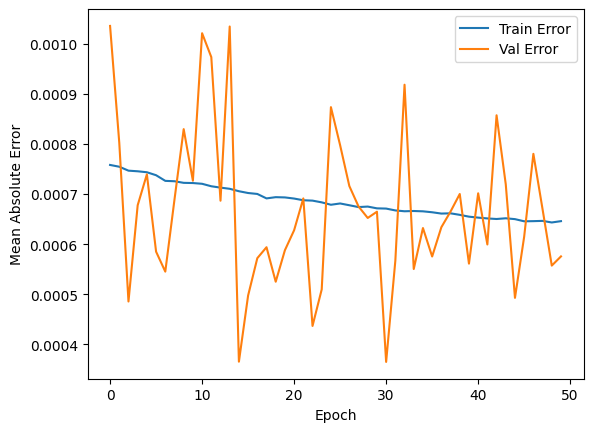

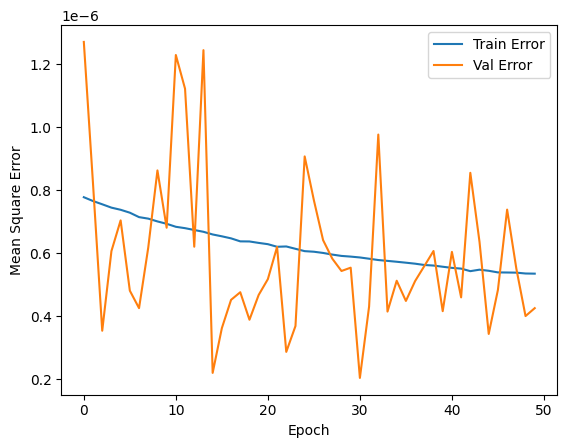

In [89]:
plot_history(history)

In [91]:
# Impressão de mais métricas para avaliação do modelo treinado
loss, mae, mse = model.evaluate(testX_standard_scaled, testY, verbose=2)
print(f"Testing set Mean Abs Error: {mae}")

4019/4019 - 1s - 195us/step - loss: 4.2443e-07 - mae: 5.7508e-04 - mse: 4.2443e-07
Testing set Mean Abs Error: 0.0005750751006416976


In [92]:
# Realização de uma predição com o modelo treinado
predictions = model.predict(testX_standard_scaled).flatten()

4019/4019 ━━━━━━━━━━━━━━━━━━━━ 1s 221us/step


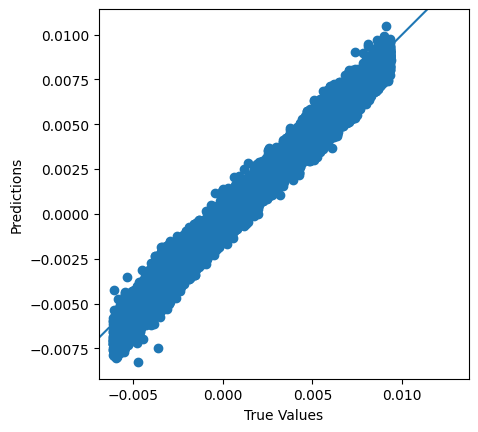

In [94]:
# Plotagem entre os valores preditos e reais nos testes. Quando mais pontos estiverem sobre a linha da diagonail x=y, melhor
plt.figure()
plt.scatter(testY.to_numpy(), predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
# plt.xlim([0, 0.3])
# plt.ylim([0, 0.3])
plt.plot([-100, 100], [-100, 100])

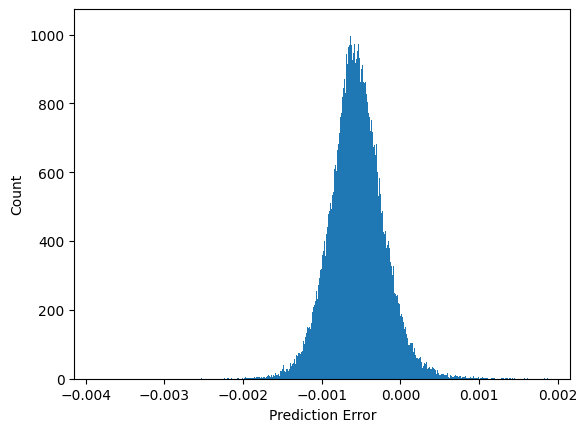

In [96]:
# Plotagem com histograma dos erros. No entanto, não funcionou muito bem em virtude da magnitude dos erros e de outliers
error = predictions - testY
plt.figure()
plt.hist(error, bins = 1000)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
# plt.xlim([0, 0.1])
plt.show()

# Tuning de Hyperparametros

In [9]:
# O equivalente ao GridSearch para o TensorFlow com Keras é o keras-tuner
# Preciso fazer a instalação do pacote para poder utilizar
!pip install keras-tuner

  Using cached keras_tuner-1.4.7-py3-none-any.whl.metadata (5.4 kB)
Using cached keras_tuner-1.4.7-py3-none-any.whl (129 kB)


In [8]:
!pip uninstall -y tensorflow[and-cuda]
!pip install tensorflow[and-cuda]

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
  Using cached tensorflow-2.18.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
Using cached tensorflow-2.18.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.5 MB)


In [1]:
import os

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

In [ ]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner?hl=pt-br
# Importação das bibliotecas necessárias para fazer o search dos hyperparâmetros das possíveis redes neurais

# Exemplo de tuning https://www.kdnuggets.com/2020/02/hyperparameter-tuning-keras-tuner.html
import tensorflow as tf
import keras_tuner as kt

from tensorflow import keras

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if len(gpus) > 0:
    print("GPU ok!")
    print(gpus)
    # tf.config.experimental.set_memory_growth(gpus[0], True)
    # tf.config.set_visible_devices([], 'CPU') # hide the CPU
    tf.config.set_visible_devices(gpus[0], 'GPU') # unhide potentially hidden GPU
    tf.config.get_visible_devices()
else:
    print("No GPU")

GPU ok!
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [72]:
# Essa é uma nova definição da função que monta a rede neural.
# A primeira definição monta uma única rede neural já de uma maneira rígida.
# Essa função aceita uma variação dos parâmetros como é feito no GridSearch
def model_builder(hp):
    model = keras.Sequential()
    
    # Camada de entrada
    # Apareceu um warning indicando que não é necessário definir a camada de entrada
    # model.add(keras.layers.Flatten(input_shape=[len(trainX_scaled[0])]))

    hp_units = hp.Int(
        'units', 
        min_value=32, 
        max_value=512, 
        step=8,
        default=32
    )
    
    hp_activation = hp.Choice(
        'dense_activation',
        values=['relu', 'tanh', 'sigmoid', 'linear'],
        default='relu'
    )

    # Primeira e segunda camadas escondidas
    model.add(keras.layers.Dense(units=hp_units, activation=hp_activation))
    model.add(keras.layers.Dense(units=hp_units, activation=hp_activation))

    # Camada de saída definida como fixa com 1 neurônio
    model.add(keras.layers.Dense(1, activation=hp_activation))

    # Learning rate variável
    # Novamente, eu uso o hp que o builder recebe para fazer a possibilidade de variação
    # Aqui estou variando o parâmetro learning_rate nas seguintes escolhas possíveis 1e-2, 1e-3 e 1e-4
    hp_learning_rate = hp.Float(
        'learning_rate',
        min_value=1e-5,
        max_value=1e-2,
        sampling='LOG',
        default=1e-3
    )

    # Montando o modelo
    # Na compilação do modelo, eu tenho que definir o optimizer com um learning_rate, justamente o qual eu coloco o hp_learning_rate para deixar variável
    # A métrica para a avaliação foi definida como acurácia, mas poderia mudar
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        # Metricas possíveis para problemas de regressão https://keras.io/api/metrics/regression_metrics/
        metrics=['mse']
    )

    return model

In [73]:
# Criando um keras-tuner do tipo Hyperband, mas poderia ser RandomSearch, Hyperband, BayesianOptimization e Sklearn
# Se der problema com o NUMA node, seguir esse tutorial aqui https://gist.github.com/zrruziev/b93e1292bf2ee39284f834ec7397ee9f
SEED = 12345
MAX_TRIALS = 20
EXECUTIONS = 2
HYPERBAND_MAX_EPOCHS = 40

In [74]:
random_tuner = kt.RandomSearch(
    model_builder,
    objective='val_mse',
    seed=SEED,
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTIONS,
    directory='./tuners',
    project_name='random_search'
)

random_tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Int)
{'default': 32, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 8, 'sampling': 'linear'}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid', 'linear'], 'ordered': False}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [75]:
hyperband_tuner = kt.Hyperband(
    model_builder,
    objective='val_mse',
    seed=SEED,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    executions_per_trial=EXECUTIONS,
    # factor=3,
    directory='./tuners',
    project_name='hyperband',
)

hyperband_tuner.search_space_summary()

Reloading Tuner from ./tuners/hyperband/tuner0.json
Search space summary
Default search space size: 3
units (Int)
{'default': 32, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 8, 'sampling': 'linear'}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid', 'linear'], 'ordered': False}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [76]:
# Novamente definindo um early stopping com paciência até menor que a anterior.
# Caso não se tenha um ganho no val_loss significativo após 5 épocas, ele para o treinamento.
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=5)

In [77]:
# Realização da busca de hyperparâmetros segundo o que foi definido anteriormente
hyperband_tuner.search(
    trainX_standard_scaled,
    trainY,
    epochs=40,
    validation_split=0.2, 
    # callbacks=[early_stop]
)

best_model = hyperband_tuner.get_best_models(num_models=1)[0]
loss, accuracy = best_model.evaluate(testX, testY)

print(hyperband_tuner.results.summary())
print(best_model)
print(f"Loss and accuracy: {loss} - {accuracy}")

Trial 26 Complete [00h 00m 29s]
val_mse: 1.3845455646514893

Best val_mse So Far: 0.0
Total elapsed time: 00h 19m 17s

Search: Running Trial #27

Value             |Best Value So Far |Hyperparameter
144               |280               |units
sigmoid           |sigmoid           |dense_activation
0.0004896         |6.1704e-05        |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


/home/andre/venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-12-20 15:02:35.933925: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_289', 4 bytes spill stores, 4 bytes spill loads

2024-12-20 15:02:36.003373: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_289', 16 bytes spill stores, 16 bytes spill loads

2024-12-20 15:02:36.071742: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_128', 444 bytes spill stores, 476

7470/7502 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.0000e+00 - mse: 0.0824

2024-12-20 15:02:42.320222: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_128', 24 bytes spill stores, 24 bytes spill loads

2024-12-20 15:02:42.363078: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_289', 4 bytes spill stores, 4 bytes spill loads

2024-12-20 15:02:42.413078: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_289', 16 bytes spill stores, 16 bytes spill loads

2024-12-20 15:02:42.436814: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_128', 464 bytes spill stores, 496 bytes spill loads

2024-12-20 15:02:42.495608: I external/local_xla/xla/stream_exec

7502/7502 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.0000e+00 - mse: 0.0824

2024-12-20 15:02:44.531097: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_28', 288 bytes spill stores, 288 bytes spill loads



7502/7502 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0000e+00 - mse: 0.0824 - val_loss: 0.0000e+00 - val_mse: 0.0824
Epoch 2/2
7499/7502 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.0000e+00 - mse: 0.0824

KeyboardInterrupt: 

# Antigo

In [ ]:
# Melhores parâmetros obtidos
best_hps = hyperband_tuner.get_best_hyperparameters(num_trials=1)[0]

# Construindo o modelo com os melhores parâmetros
model = tuner.hypermodel.build(best_hps)

# Realizando o treinamento com os dados
history = model.fit(
    trainX_standard_scaled,
    trainY,
    epochs=10, 
    validation_split=0.2
)

# Pegando a melhor época
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1

best_epoch

In [19]:
# Treinamento do modelo com os melhores parâmetros e melhor época
hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(
    trainX_standard_scaled,
    trainY,
    epochs=best_epoch, 
    validation_split=0.2
)

7502/7502 ━━━━━━━━━━━━━━━━━━━━ 7s 878us/step - accuracy: 0.0132 - loss: 0.0000e+00 - val_accuracy: 0.0131 - val_loss: 0.0000e+00


In [20]:
# Avaliação dos resultados
eval_result = hypermodel.evaluate(testX_standard_scaled, testY)
print("[test loss, test accuracy]:", eval_result)

4019/4019 ━━━━━━━━━━━━━━━━━━━━ 3s 671us/step - accuracy: 0.0123 - loss: 0.0000e+00
[test loss, test accuracy]: [0.0, 0.012643267400562763]


In [21]:
# Avaliação dos resultados
eval_result = model.evaluate(testX_standard_scaled, testY)
print("[test loss, test accuracy]:", eval_result)

4019/4019 ━━━━━━━━━━━━━━━━━━━━ 3s 647us/step - accuracy: 0.0122 - loss: 0.0000e+00
[test loss, test accuracy]: [0.0, 0.012542183510959148]


In [ ]:
# Leituras futuras sobre o keras-tuner. Tem um tensorboard que parece interessante por mostrar graficamente as redes e as buscas por hyperparâmetros
# https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html?hl=pt-br&_gl=1*16he0rb*_ga*NjU4MDE2Mjg2LjE3Mjc3MTUxNjE.*_ga_W0YLR4190T*MTczMDM4Njc1NC40LjEuMTczMDM4Nzc5NC4wLjAuMA..
# https://keras.io/keras_tuner/
# https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams?hl=pt-br

# Portando para o Esp32

In [96]:
# A fase final é a exportação do modelo obtido para a arquitetura esp32 a fim de ser executada no freematics
# Importação das bibliotecas necessárias
import os
import numpy as np

In [97]:
# Função para excrever a biblioteca que leva o modelo em hexadecimal
def hex_to_c_array(hex_data, var_name):  
    # Start Header
    starting_header = """#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif
    
"""

    # Declare C variable
    declare_variable = f"const unsigned char {var_name}[]  DATA_ALIGN_ATTRIBUTE = " + "{"

    # Constructing Hex
    hex_array = []
    for i, val in enumerate(hex_data):
        # Parsing hex to string
        hex_str = format(val, '#04x')

        # Lines with 80 chars
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)
    hex = '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

    # Close Header
    closing_header = f"const int {var_name}_len = {str(len(hex_data))};\n"

    return starting_header + declare_variable + hex + closing_header

In [98]:
def representative_dataset():
    for i in range(len(trainX_scaled)):
        input_data = np.array([trainX_scaled[i]], dtype=np.float32)
        yield [input_data]

In [99]:
# Conversor para a arquitetura esp32 com TFLite e o Keras
def converter_quantization_model(model, model_name, quant_type):
    # É necessário exportar o modelo da memória para o arquivo e carregar em seguida
    # A conversão direta como está na linha comentada gera erro no keras.
    model.export(f"./MLP/temp/{model_name}")
    converter = tf.lite.TFLiteConverter.from_saved_model(f"./MLP/temp/{model_name}")
    # converter = tf.lite.TFLiteConverter.from_keras_model(model)

    
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    converter.target_spec.supported_types = [quant_type]

    # Quantizações de 32 e 8 bits
    if quant_type == tf.float32:
        converter._experimental_lower_tensor_list_ops = False
        converter.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
    elif quant_type == tf.int8:
        # converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8, tf.lite.OpsSet.SELECT_TF_OPS]
        # converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
        converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
        converter.experimental_new_converter = True
        converter.experimental_new_quantizer = True
        converter.experimental_new_calibrator = True
    
    converter.representative_dataset = representative_dataset
    tflite_model = converter.convert()

    
    print(tflite_model)

    with open(f"./MLP/models/{model_name}.h", 'w') as file:
        file.write(hex_to_c_array(tflite_model, model_name))

    with open(f"./MLP/models/{model_name}.tflite", 'wb') as file:
        file.write(tflite_model)

    size_model_tflite = os.path.getsize(f"./MLP/models/{model_name}.tflite")
    print(f"./MLP/models/{model_name}.tflite: {size_model_tflite} Bytes")

In [100]:
# Gerando as bibliotecas de 32 e 8 bits para juntar no projeto do esp32
converter_quantization_model(model, "Primeiro_float32", tf.float32)
converter_quantization_model(model, "Primeiro_int8", tf.int8)

INFO:tensorflow:Assets written to: ./MLP/temp/Primeiro_float32/assets


INFO:tensorflow:Assets written to: ./MLP/temp/Primeiro_float32/assets


Saved artifact at './MLP/temp/Primeiro_float32'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133792861194576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861193616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861192464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861195344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861193424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861197840: TensorSpec(shape=(), dtype=tf.resource, name=None)
b'\x1c\x00\x00\x00TFL3\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x98\x00\x00\x00\xf0\x00\x00\x00\x14\x12\x00\x00$\x12\x00\x00,\x16\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x10\x00\x0c\x00\x08\x00\

W0000 00:00:1730392111.517996    5163 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1730392111.518005    5163 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-10-31 13:28:31.518105: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: ./MLP/temp/Primeiro_float32
2024-10-31 13:28:31.518401: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-10-31 13:28:31.518407: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: ./MLP/temp/Primeiro_float32
2024-10-31 13:28:31.521635: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2024-10-31 13:28:31.534768: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: ./MLP/temp/Primeiro_float32
2024-10-31 13:28:31.539055: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 20950 microseconds.
INFO:tensorf

Saved artifact at './MLP/temp/Primeiro_int8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133792861194576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861193616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861192464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861195344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861193424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861197840: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1730392111.668295    5163 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1730392111.668316    5163 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-10-31 13:28:31.668434: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: ./MLP/temp/Primeiro_int8
2024-10-31 13:28:31.668713: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-10-31 13:28:31.668720: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: ./MLP/temp/Primeiro_int8
2024-10-31 13:28:31.672061: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2024-10-31 13:28:31.685592: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: ./MLP/temp/Primeiro_int8
2024-10-31 13:28:31.689765: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 21335 microseconds.


b' \x00\x00\x00TFL3\x00\x00\x00\x00\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x8c\x00\x00\x00\x0c\x01\x00\x004\x06\x00\x00D\x06\x00\x00t\x0c\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00z\xf9\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x00<\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00h\xff\xff\xff\x08\x00\x00\x00\x04\x00\x00\x00\x08\x00\x00\x00output_0\x00\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00^\xfa\xff\xff\x04\x00\x00\x00\x0e\x00\x00\x00keras_tensor_4\x00\x00\x03\x00\x00\x00\\\x00\x00\x00,\x00\x00\x00\x04\x00\x00\x00\xb8\xff\xff\xff\x0c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\xdc\xff\xff\xff\x0b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\n\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\r\x00\x00\x00$\x05\x00\x00\x1c\x05\x00\x00\xfc\x04\x00\x00\xe4\x02\x00\x00\xd

fully_quantize: 0, inference_type: 6, input_inference_type: FLOAT32, output_inference_type: FLOAT32
